In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/labeledTrainData.tsv", header=0, delimiter="\t")

In [3]:
from bs4 import BeautifulSoup

In [4]:
def remove_html(row):
    return BeautifulSoup(row['review'], 'html.parser').get_text()

In [5]:
data['review'] = data.apply(remove_html, axis=1)

In [6]:
from nltk.tokenize import TweetTokenizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tweeter_tokenizer = TweetTokenizer()
import nltk
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize, stop_words='english', max_features=5000)

In [9]:
X_train = vectorizer.fit_transform(data['review'])

In [10]:
X_train.shape

(25000, 1000)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
forest = RandomForestClassifier(n_estimators = 100)

In [13]:
forest = forest.fit( X_train.toarray(), data["sentiment"] )

In [14]:
test = pd.read_csv("data/testData.tsv", header=0, delimiter="\t")

In [15]:
test['review'] = test.apply(remove_html, axis=1)

In [16]:
X_test = vectorizer.fit_transform(test['review'])

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import numpy as np

In [18]:
predictions = forest.predict(X_test)

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(sentiments)))
    plt.xticks(tick_marks, set(sentiments), rotation=45)
    plt.yticks(tick_marks, set(sentiments))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
from sklearn.cross_validation import train_test_split

In [27]:
reviews = data['review']
sentiments = data['sentiment']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)

In [58]:
X_train = vectorizer.fit_transform(X_train)

In [59]:
X_test = vectorizer.fit_transform(X_test)

In [60]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit( X_train.toarray(), y_train )
predictions = forest.predict(X_test)

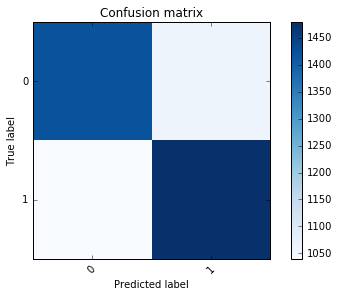

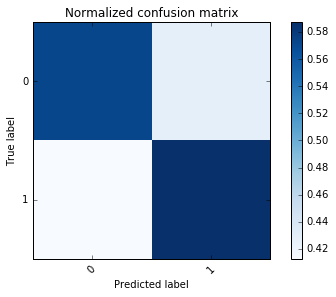

In [61]:
cm = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [62]:
from sklearn.metrics import roc_curve, auc

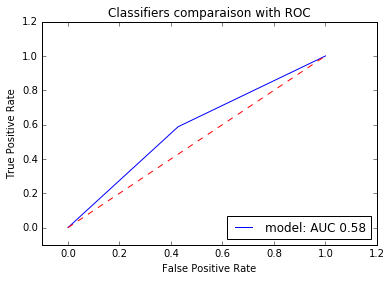

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='%s: AUC %0.2f'% ('model',roc_auc))
plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
print(metrics.classification_report(y_test, predictions, target_names = ["positive", "negative"]))

             precision    recall  f1-score   support

   positive       0.58      0.57      0.57      2481
   negative       0.58      0.59      0.58      2519

avg / total       0.58      0.58      0.58      5000

